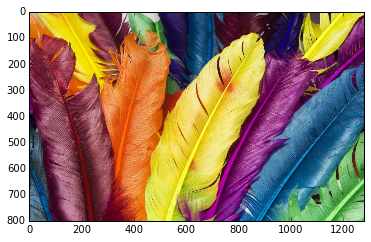

In [75]:
#Task 2
from scipy import misc
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import matplotlib.image as mpimg
import random as rnd
import matplotlib.mlab as mlab
from skimage import io, color


%matplotlib inline


img = mpimg.imread('colorful2.jpg')
plt.imshow(img)


1) Color Quantization Function (# of Clusters K as input)

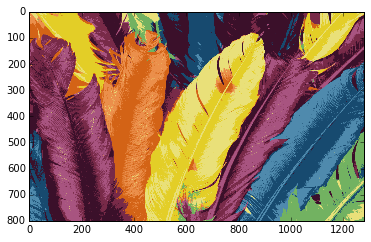

In [112]:
def quantization(img,k): 
    
    
    #Sets up image for KMEANS, by getting 2d sample
    width, height, depth = original_shape = tuple(img.shape)
    img_array = np.reshape(np.array(img,dtype=np.float64)/255, (width*height, depth))
    img_array_sample = shuffle(img_array, random_state=0)[:1000]
    
    
    
    #Performs KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_array_sample)
    labels = kmeans.predict(img_array)
    codebook_random = shuffle(img_array, random_state=0)[:k + 1]
    labels_random = pairwise_distances_argmin(codebook_random, img_array,axis = 0)
    codebook = kmeans.cluster_centers_
    d = codebook.shape[1]
    img2 = np.zeros((w,h,d))
    
    
    #Recreates the image
    label_index = 0
    for i in range(w):
        for j in range(h):
            img2[i][j] = codebook[labels[label_index]]
            label_index += 1
    plt.imshow(img2)

    pass

quantization(img,10)


2)RGB to LAB and back

In [106]:
def toLab(img,k):
    
    #To Lab 
    lab = color.rgb2lab(img)
    
    #Quantizes L-channel only
    
    lab_L = lab[:,:,0]
    #lab_array = np.reshape(np.array(lab_L,dtype=np.float64)/255, (800*1280))
    lab_array = np.array(lab_L,dtype=np.float64)/255
    lab_array_sample = shuffle(lab_array, random_state=0)[:1000]
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(lab_array_sample)
    labels = kmeans.predict(lab_array)
    codebook_random = shuffle(lab_array, random_state=0)[:k + 1]
    labels_random = pairwise_distances_argmin(codebook_random, lab_array,axis = 0)
    codebook = kmeans.cluster_centers_
    d = codebook.shape[1]
    image = np.zeros((w,h,d))
    
    label_idx = 0
    for i in range(w-1):
        for j in range(h-1):
            image[i][j] = codebook[labels[label_idx]]
#             image[i][j][1] = lab_L[i][j][1]
#             image[i][j][2] = lab_L[i][j][2]
            label_idx += 1


    #Normalizes L-channel
    
    
    #Adds Quantized L-channel to orignal Converts back
    #img2 = color.lab2rgb(image)
    plt.imshow(image)
    pass

toLab(img,20)

IndexError: index 800 is out of bounds for axis 0 with size 800

3)SSD between two RGB images

In [30]:
def ssd(img1,img2):
    #plt.imshow(img1)
#     img3 = [[[0]*768]*1024]*3
    print(img1[0])
#     for i in img1:
#         for j in img1[i]:
#             for k in img1[i][j]:
#                 img3[i][j][k] = img1[i][j][k]-img2[i][j][k]


    sum = 0 
    for i in range(len(img1)):
        for j in range(len(img1[i])):
            for k in range(len(img1[i][j])):
                sum = sum + ((img1[i][j][k]-img2[i][j][k])*(img1[i][j][k]-img2[i][j][k]))

    print(sum)
 
    pass

ssd(mpimg.imread('landscape.jpg'),mpimg.imread('face.png'))

[[12 13  8]
 [14 11  6]
 [11  7  6]
 ..., 
 [11 11 23]
 [ 8  9 27]
 [ 7  6 12]]
43059742627.6


4)Histogram Generation

(array([  3441.,   7749.,   8782.,   8226.,   8376.,   9190.,  10268.,
         11185.,  11689.,  12568.,  13010.,  13759.,  14438.,  15128.,
         15535.,  16506.,  16877.,  17716.,  18325.,  19285.,  20084.,
         20160.,  21083.,  23444.,  26003.,  27697.,  28640.,  27705.,
         25475.,  24931.,  24424.,  22674.,  21662.,  22346.,  23461.,
         22147.,  21721.,  19884.,  18213.,  16236.,  14225.,  12577.,
         11429.,   9701.,   8782.,   7012.,   5034.,   3786.,   2655.,
          1157.,     31.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

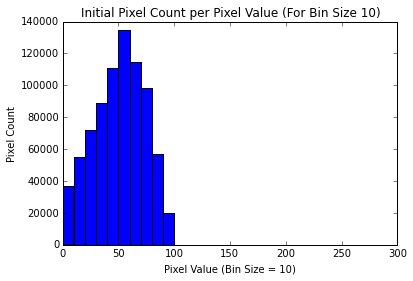

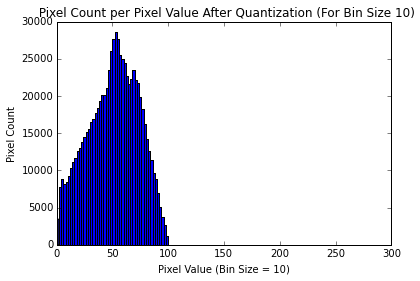

In [65]:
# def histogramCreate(img):
    
#     #Regularly spaced bins
    
#     #To Lab 
#     lab = color.rgb2lab(img)
    
#     lab
    
#     #n, bins, patches = plt.hist(lab[0][:][0], 50, normed=1, facecolor='green', alpha=0.75)
    
# #     plt.xlabel('Smarts')
# #     plt.ylabel('Probability')
# #     plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
# #     plt.axis([40, 160, 0, 0.03])
# #     plt.grid(True)

# #     plt.show()
    
    
#     #Bins spaced according to quantization
    
    
#     pass

# 

lab = color.rgb2lab(img)
width, height, level = lab.shape
l_data = []
for i in lab:
    for j in i:
        l_data.append(j[0])
plt.figure(1)
plt.title('Initial Pixel Count per Pixel Value (For Bin Size 10)')
plt.xlabel('Pixel Value (Bin Size = 10)')
plt.ylabel('Pixel Count')
plt.hist(l_data, bins=range(0,255 + 10, 10))

plt.figure(2)
plt.title(' Pixel Count per Pixel Value After Quantization (For Bin Size 10)')
plt.xlabel('Pixel Value (Bin Size = 10)')
plt.ylabel('Pixel Count')
plt.hist(l_data, bins=range(0,255 + 2, 2))



5)Summary

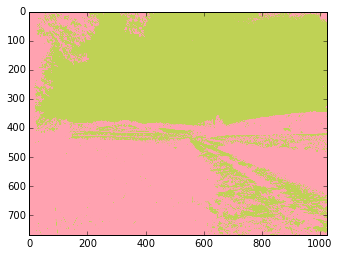

In [118]:
quantization(img,10)
quantization(img,2)

In [103]:
img3 = mpimg.imread('house.jpg')
w, h, l = img3.shape
wide_range = [[[0]*w]*h]*l
print(wide_range)
#plt.imshow(img3)


[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0